# Capstone Project - Battle of Neighborhood (Week 4-5)
#### By Deepak Kumar Ojha

### 1. Introduction: 

Link to Jupyter Notebook in IBM Cloud : [Link](https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/31d576ae-95c2-4b2f-8d5b-dc804f75d4c4/view?access_token=b50950ae67ec8c3f4338afe888a9c4906c19acfb07c207630361c12d1ea8f19d)

#### Background

This project report is for those who are planning to **invest on opening a new luxury hotel in the city of Gurgaon,India**. It provides a recommendation on what would be the best venue to start a new hotel in a highly visited city with already many good hotels.

Gurgaon, officially named Gurugram, is a city located in the northern Indian state of Haryana. It is situated near the Delhi-Haryana border, about 30 kilometres (19 mi) southwest of the national capital New Delhi and 268 km (167 mi) south of Chandigarh, the state capital.It is one of the major satellite cities of Delhi and is part of the National Capital Region of India. As of 2011, Gurgaon had a population of 876,900. Gurgaon has become a leading financial and industrial hub with the third-highest per capita income in India.The city's economic growth story started when the leading Indian automobile manufacturer Maruti Suzuki India Limited established a manufacturing plant in Gurgaon in the 1970s. Today, Gurgaon has local offices for more than 250 Fortune 500 companies. Gurgaon is categorised as very high on the Human Development Index, with an HDI of 0.889 (2017), which is also the highest in India.

#### Business Problem

This report focusses on the issue of where to open a new hotel in a city like Gurgaon, once one has decided to go ahead. Let’s imagine the my client company is willing to open a new luxury hotel, a first and foremost important decision will be the location for its new hotel.

1. What are the highest rated hotel locations in Gurgaon city?
2. Which place has more number of restaurants in proximity?
3. Which neighborhood is the best location for opening a luxury hotel?

### 2. Data Section

For this capstone project, we will be using 2 data sources for our analysis

**Data Source 1** : [Zomato Dataset (from Kaggle)](https://www.kaggle.com/shrutimehta/zomato-restaurants-data) <br>
**Description** : This dataset contains **Locality** data of **Gurgaon, India** along with their **latitude** and **longitude**
<br><br>
**Data Source 2** : Foursquare API <br>
**Description** : Using this API, we will fetch the neighborhoods of each **Locality** of **Gurgaon, India**

### 3. Methodology Section

The Methodology section comprises of below stages:

1. Collect Data and load into pandas dataframe
2. Data Cleaning & Preprocessing 
3. Exploratory Data Analysis
4. Use Foursquare API to get neighborhood venues
5. Visualize the locality using folium library
6. Modelling using k-means clustering based on common neighborhoods
7. Derive conclusions from the model

### Load Libraries

In [ ]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

In [3]:
!conda install -c conda-forge geocoder --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

    geocoder: 1.38.1-py_1 conda-forge
    ratelim:  0.1.6-py_2  conda-forge


ratelim-0.1.6        | 6 KB      | ##################################### | 100% 
geocoder-1.38.1      | 53 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [4]:
import pandas as pd
import numpy as np

# library to handle requests
import requests

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
 
# map rendering library
import folium

# For geo-location data
import geocoder
import geopy

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


### Read Zomato location data into pandas dataframe

In [9]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6f3d1acb57af443d936808d0f76a3529 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HIDDEN',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6f3d1acb57af443d936808d0f76a3529.get_object(Bucket='capstoneprojectibmdatascience-donotdelete-pr-mpmzqolvbfeva5',Key='zomato.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body,encoding='ISO-8859-1')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
df.shape

(9551, 21)

### Analyze and Understand data

In [11]:
df['City'].value_counts().to_frame().head()

,City
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25


In [12]:
# Filter dataset for Gurgaon City, India only
dfGGN = df[df['City'] == 'Gurgaon']
dfGGN.reset_index(drop=True, inplace=True)
dfGGN.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
2,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [13]:
dfGGN.shape

(1118, 21)

### Data Cleaning & Pre-processing

In [14]:
# Meaningful column Names
dfClean= dfGGN[dfGGN.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
dfClean.shape

(1070, 8)

In [15]:
dfClean.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4


### Visualize data using Folium

In [16]:
RestGGN = folium.Map(location=[28.48, 77.09], zoom_start=12)

X = dfClean['Latitude']
Y = dfClean['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=4, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow']
dfClean['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(dfClean['Latitude'], dfClean['Longitude'], dfClean['Locality'], dfClean['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(RestGGN)  

RestGGN

### Exploratory Data Analysis

In [19]:
import matplotlib.pyplot as plt

In [17]:
dfClean.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16,1
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80,1
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887,0
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802,0
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4,2


### Best locality for high rated hotels in Gurgaon

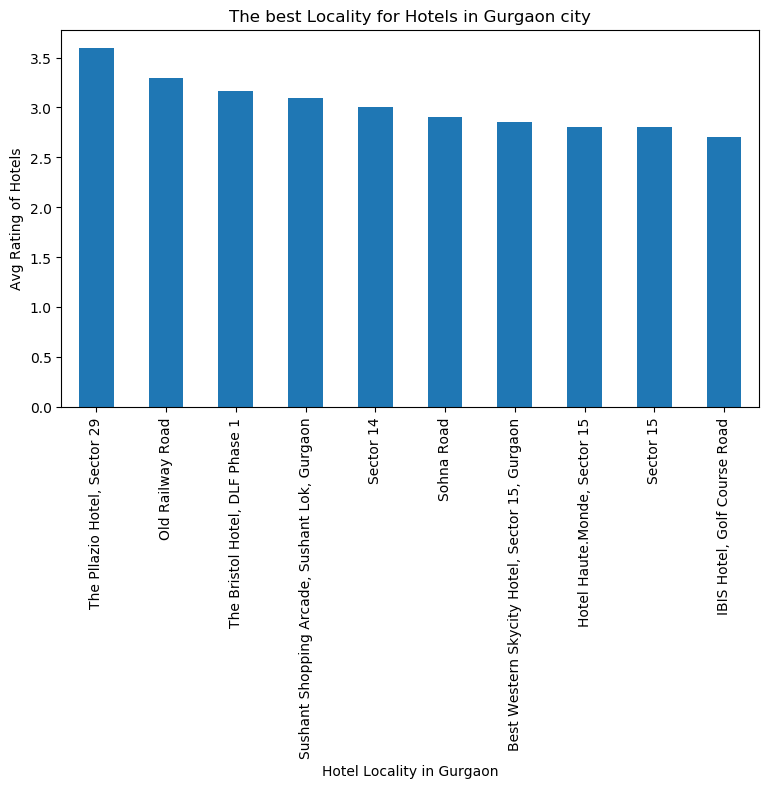

In [26]:
# Find locality with highest avg rating of hotels

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Hotels in Gurgaon city')
#On x-axis

#giving a bar plot
dfClean[dfClean['Restaurant Name'].str.contains('Hotel')].groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Hotel Locality in Gurgaon')
#On y-axis
plt.ylabel('Avg Rating of Hotels')

#displays the plot
plt.show()

**Sector-29** is the best locality for hotels

### Locality with highest number of restaurants/ Food joints

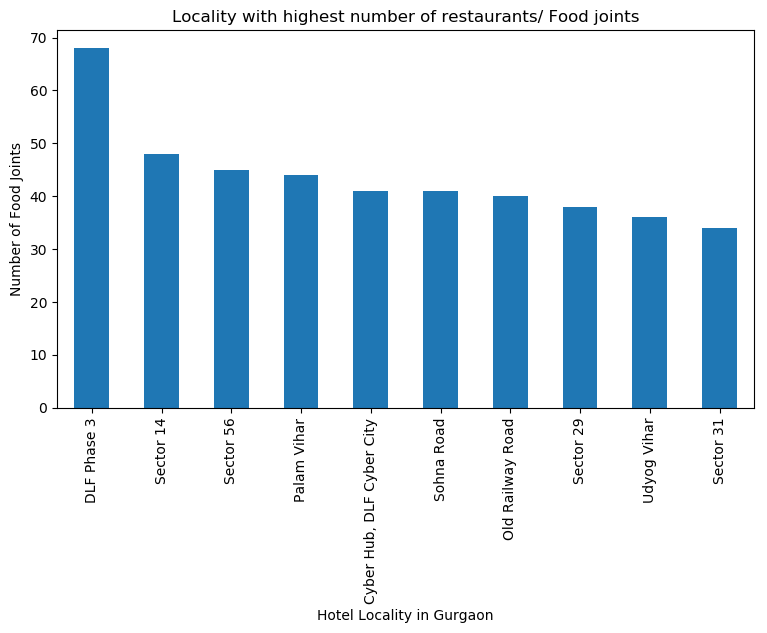

In [27]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Locality with highest number of restaurants/ Food joints')
#On x-axis

#giving a bar plot
dfClean.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Hotel Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Food Joints')

#displays the plot
plt.show()

**DLF Phase-3** has highest number of restaurants/food joints

#### Data Transformation/ Merging

In [29]:
dfLocWiseRest =  dfClean.groupby('Locality').count()['Restaurant Name'].to_frame()
dfLocWiseAvgRating= dfClean.groupby('Locality')['Aggregate rating'].mean().to_frame()
dfLocWiseCuisines = dfClean.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
dfLocWiseRate = dfClean.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
dfLocWiseVote = dfClean.groupby(['Locality'])['Votes'].sum().to_frame()
dfLocWiseLat = dfClean.groupby('Locality').mean()['Latitude'].to_frame()
dfLocWiseLong = dfClean.groupby('Locality').mean()['Longitude'].to_frame()

In [30]:
dfFinal = pd.merge(dfLocWiseLat,dfLocWiseLong,on='Locality').merge(dfLocWiseRest, on='Locality').merge(dfLocWiseCuisines, on='Locality').merge(dfLocWiseAvgRating,on ='Locality').merge(dfLocWiseRate, on ='Locality').merge(dfLocWiseVote, on ='Locality')

In [31]:
dfFinal.head()

,Locality,Latitude,Longitude,Restaurant Name,Cuisines,Aggregate rating,Rating text,Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.050000,Average,96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.150000,Very Good,2689
2,"Ansal Plaza Mall, Palam Vihar",28.511446,77.041952,4,"Bakery, Ice Cream, Chinese, Fast Food",2.250000,"Average, Not rated",21
3,Ardee City,28.436988,77.078750,17,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",0.529412,"Average, Not rated",76
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.850000,Average,28


### Define Foursquare Credentials and Version

In [32]:
CLIENT_ID = 'HIDDEN' # Foursquare ID
CLIENT_SECRET = 'HIDDEN' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Function to get venues for all locality using API

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Find all venues in locality of Gurgaon

In [34]:
ggn_venues = getNearbyVenues(names=dfFinal['Locality'],
                                   latitudes=dfFinal['Latitude'],
                                   longitudes=dfFinal['Longitude']
                                  )

 ILD Trade Centre Mall, Sohna Road
Ambience Mall, Gurgaon
Ansal Plaza Mall, Palam Vihar
Ardee City
Best Western Skycity Hotel, Sector 15, Gurgaon
Central Arcade, DLF Phase 2, Gurgaon
Central Plaza Mall, Golf Course Road
Country Inn & Suites By Carlson, Udyog Vihar
Country Inn & Suites by Carlson, Gurgaon
Country Inn & Suites by Carlson, Sector 12
Country Inn & Suites, Sohna Road
Courtyard by Marriott, Sushant Lok
Cross Point Mall, DLF Phase 4
Crowne Plaza, Sector 29
Cyber Greens, DLF Cyber City
Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel

In [35]:
ggn_venues.shape

(1543, 7)

In [36]:
ggn_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater


In [37]:
ggn_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",11,11,11,11,11,11
"Ambience Mall, Gurgaon",38,38,38,38,38,38
"Ansal Plaza Mall, Palam Vihar",4,4,4,4,4,4
"Best Western Skycity Hotel, Sector 15, Gurgaon",5,5,5,5,5,5
"Central Arcade, DLF Phase 2, Gurgaon",21,21,21,21,21,21
"Central Plaza Mall, Golf Course Road",11,11,11,11,11,11
"Country Inn & Suites By Carlson, Udyog Vihar",8,8,8,8,8,8
"Country Inn & Suites by Carlson, Gurgaon",11,11,11,11,11,11
"Country Inn & Suites by Carlson, Sector 12",8,8,8,8,8,8


In [39]:
print('There are {} uniques categories.'.format(len(ggn_venues['Venue Category'].unique())))

There are 137 uniques categories.


### Analyze Each Locality

In [40]:
# one hot encoding
ggn_onehot = pd.get_dummies(ggn_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
ggn_onehot['Locality'] = ggn_venues['Locality'] 

# move Locality column to the first column
column_list = ggn_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
ggn_onehot = ggn_onehot[column_list]

ggn_onehot.head()

,Locality,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
ggn_grouped = ggn_onehot.groupby('Locality').mean().reset_index()
ggn_grouped

,Locality,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,"ILD Trade Centre Mall, Sohna Road",0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,"Ambience Mall, Gurgaon",0.052632,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,"Ansal Plaza Mall, Palam Vihar",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,"Best Western Skycity Hotel, Sector 15, Gurgaon",0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,"Central Arcade, DLF Phase 2, Gurgaon",0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,"Central Plaza Mall, Golf Course Road",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,"Country Inn & Suites By Carlson, Udyog Vihar",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,"Country Inn & Suites by Carlson, Gurgaon",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,"Country Inn & Suites by Carlson, Sector 12",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,"Country Inn & Suites, Sohna Road",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [42]:
ggn_grouped.shape

(109, 138)

### Print each Locality along with the top 10 most common venues

In [43]:
num_top_venues = 10

for hood in ggn_grouped['Locality']:
    print("----"+hood+"----")
    temp = ggn_grouped[ggn_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
                     venue  freq
0            Movie Theater  0.18
1        Indian Restaurant  0.18
2                  Brewery  0.18
3      Sporting Goods Shop  0.09
4     Fast Food Restaurant  0.09
5            Shopping Mall  0.09
6         Department Store  0.09
7                BBQ Joint  0.09
8        Korean Restaurant  0.00
9  New American Restaurant  0.00


----Ambience Mall, Gurgaon----
                  venue  freq
0     Indian Restaurant  0.11
1    Italian Restaurant  0.08
2  Fast Food Restaurant  0.08
3   American Restaurant  0.05
4                   Bar  0.05
5         Shopping Mall  0.05
6        Clothing Store  0.05
7                  Café  0.05
8             Multiplex  0.05
9                   Gym  0.03


----Ansal Plaza Mall, Palam Vihar----
                     venue  freq
0              Pizza Place  0.50
1                     Food  0.25
2                     Café  0.25
3      American Restaurant  0.00
4                   Office

In [44]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = ggn_grouped['Locality']

for ind in np.arange(ggn_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ggn_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Indian Restaurant,Movie Theater,Brewery,Department Store,Shopping Mall,BBQ Joint,Fast Food Restaurant,Sporting Goods Shop,Yoga Studio,Falafel Restaurant
1,"Ambience Mall, Gurgaon",Indian Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Café,Clothing Store,Multiplex,Bar,Shopping Mall,Movie Theater
2,"Ansal Plaza Mall, Palam Vihar",Pizza Place,Food,Café,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Yoga Studio
3,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Asian Restaurant,Farmers Market,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop
4,"Central Arcade, DLF Phase 2, Gurgaon",Indian Restaurant,Shopping Mall,Department Store,American Restaurant,Brewery,Donut Shop,Coffee Shop,Clothing Store,Café,Scenic Lookout
5,"Central Plaza Mall, Golf Course Road",Italian Restaurant,Chinese Restaurant,Falafel Restaurant,Café,Ice Cream Shop,Diner,Sandwich Place,Yoga Studio,Flea Market,Fast Food Restaurant
6,"Country Inn & Suites By Carlson, Udyog Vihar",Clothing Store,Hotel,Fast Food Restaurant,Campground,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Diner,Department Store,Food & Drink Shop
7,"Country Inn & Suites by Carlson, Gurgaon",Hotel,Japanese Restaurant,Go Kart Track,Indian Restaurant,Resort,Electronics Store,Café,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
8,"Country Inn & Suites by Carlson, Sector 12",Hotel,Indian Restaurant,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
9,"Country Inn & Suites, Sohna Road",Hotel,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Hotel Bar


### Modelling - k-Means Clustering

In [47]:
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

ggn_cluster = ggn_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ggn_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 
kmeans.labels_.shape

(109,)

In [48]:
dfFinal.shape

(113, 8)

In [51]:
# add clustering labels
ggn_merged = dfFinal.head(109)
ggn_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
ggn_merged = ggn_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

ggn_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Locality,Latitude,Longitude,Restaurant Name,Cuisines,Aggregate rating,Rating text,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.050000,Average,96,1,Indian Restaurant,Movie Theater,Brewery,Department Store,Shopping Mall,BBQ Joint,Fast Food Restaurant,Sporting Goods Shop,Yoga Studio,Falafel Restaurant
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.150000,Very Good,2689,1,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Café,Clothing Store,Multiplex,Bar,Shopping Mall,Movie Theater
2,"Ansal Plaza Mall, Palam Vihar",28.511446,77.041952,4,"Bakery, Ice Cream, Chinese, Fast Food",2.250000,"Average, Not rated",21,2,Pizza Place,Food,Café,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Yoga Studio
3,Ardee City,28.436988,77.078750,17,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",0.529412,"Average, Not rated",76,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.850000,Average,28,1,Hotel,Asian Restaurant,Farmers Market,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop


In [52]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'orange', 'white']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ggn_merged['Latitude'], ggn_merged['Longitude'], ggn_merged['Locality'], ggn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [59]:
# Cluster 0
ggn_merged.loc[ggn_merged['Cluster Labels'] == 0, ggn_merged.columns[[0] + [1] +[2] + list(range(5, ggn_merged.shape[1]))]]

,Locality,Latitude,Longitude,Aggregate rating,Rating text,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Ardee City,28.436988,77.078750,0.529412,"Average, Not rated",76,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Country Inn & Suites By Carlson, Udyog Vihar",28.509225,77.091835,3.500000,Good,32,0,Clothing Store,Hotel,Fast Food Restaurant,Campground,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Diner,Department Store,Food & Drink Shop
8,"Country Inn & Suites by Carlson, Gurgaon",28.461988,77.067644,3.800000,Good,91,0,Hotel,Japanese Restaurant,Go Kart Track,Indian Restaurant,Resort,Electronics Store,Café,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
9,"Country Inn & Suites by Carlson, Sector 12",28.468385,77.037736,3.250000,"Average, Good",44,0,Hotel,Indian Restaurant,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
33,"Hong Kong Bazaar Mall, Sector 57, Gurgaon",28.421012,77.090534,3.000000,Average,333,0,Convenience Store,Dessert Shop,Shopping Mall,Café,Sandwich Place,Bakery,Department Store,Gym / Fitness Center,Pizza Place,Dim Sum Restaurant
34,"Hotel Clark Inn, Sector 15",28.457618,77.033910,1.400000,"Average, Not rated",9,0,Hotel,Asian Restaurant,Farmers Market,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop
35,"Hotel Grenville, MG Road",28.465584,77.038603,1.400000,"Average, Not rated",17,0,Hotel,IT Services,Restaurant,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant
44,"Le Meridien Gurgaon, MG Road",28.481033,77.108551,3.700000,"Average, Good, Very Good",279,0,Hotel,Trail,Restaurant,Park,Nightclub,Gym,Hotel Bar,Buffet,Department Store,Deli / Bodega
56,Palam Vihar,28.503325,77.028776,1.029545,"Average, Not rated",200,0,Asian Restaurant,Shopping Mall,Restaurant,Beer Garden,Yoga Studio,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
64,"Sahara Mall, MG Road",28.479758,77.086732,3.000000,"Good, Poor",368,0,Indian Restaurant,Department Store,Bar,Coffee Shop,Donut Shop,Café,Scenic Lookout,Fast Food Restaurant,Shopping Mall,Mexican Restaurant


In [64]:
# Cluster 1
ggn_merged.loc[ggn_merged['Cluster Labels'] == 1, ggn_merged.columns[[0] + [1] +[2] + list(range(5, ggn_merged.shape[1]))]]

,Locality,Latitude,Longitude,Aggregate rating,Rating text,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,3.050000,Average,96,1,Indian Restaurant,Movie Theater,Brewery,Department Store,Shopping Mall,BBQ Joint,Fast Food Restaurant,Sporting Goods Shop,Yoga Studio,Falafel Restaurant
1,"Ambience Mall, Gurgaon",28.502845,77.097152,4.150000,Very Good,2689,1,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant,Café,Clothing Store,Multiplex,Bar,Shopping Mall,Movie Theater
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2.850000,Average,28,1,Hotel,Asian Restaurant,Farmers Market,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop
6,"Central Plaza Mall, Golf Course Road",28.443040,77.100852,3.500000,"Average, Good, Very Good",1214,1,Italian Restaurant,Chinese Restaurant,Falafel Restaurant,Café,Ice Cream Shop,Diner,Sandwich Place,Yoga Studio,Flea Market,Fast Food Restaurant
10,"Country Inn & Suites, Sohna Road",28.334942,77.068499,3.400000,Average,19,1,Hotel,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Hotel Bar
12,"Cross Point Mall, DLF Phase 4",28.468311,77.083387,3.912500,"Good, Very Good",1841,1,Café,Bakery,Coffee Shop,Indian Restaurant,Italian Restaurant,Sandwich Place,Shopping Mall,Hotel,Lounge,Market
13,"Crowne Plaza, Sector 29",28.468424,77.059999,3.800000,Good,312,1,Brewery,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Bar,Korean Restaurant,Deli / Bodega,Nightclub,Diner
14,"Cyber Greens, DLF Cyber City",28.493723,77.092824,2.800000,Average,191,1,Indian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Asian Restaurant,Pizza Place,Bar,Food Court,Italian Restaurant,Donut Shop
15,"Cyber Hub, DLF Cyber City",28.495004,77.088588,3.860976,"Average, Excellent, Good, Poor, Very Good",36185,1,Indian Restaurant,Coffee Shop,Café,Bar,Asian Restaurant,Pizza Place,Fast Food Restaurant,Mexican Restaurant,Donut Shop,Mediterranean Restaurant
17,"DLF Galleria, DLF Phase 4",28.467327,77.081848,3.582353,"Average, Good, Poor, Very Good",3208,1,Café,Indian Restaurant,Bakery,Coffee Shop,Italian Restaurant,Sandwich Place,Shopping Mall,Hotel,Lounge,Market


In [65]:
# Cluster 2
ggn_merged.loc[ggn_merged['Cluster Labels'] == 2, ggn_merged.columns[[0] + [1] +[2] + list(range(5, ggn_merged.shape[1]))]]

,Locality,Latitude,Longitude,Aggregate rating,Rating text,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Ansal Plaza Mall, Palam Vihar",28.511446,77.041952,2.250000,"Average, Not rated",21,2,Pizza Place,Food,Café,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dumpling Restaurant,Yoga Studio
80,Sector 53,28.431722,77.088724,0.000000,Not rated,0,2,Arcade,Asian Restaurant,Flea Market,Park,Liquor Store,Yoga Studio,Electronics Store,Food,Fast Food Restaurant,Farmers Market
94,"Sushant Shopping Arcade, Sushant Lok, Gurgaon",28.460448,77.079375,3.194444,"Average, Good, Poor, Very Good",598,2,Hotel,Café,Restaurant,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,Bakery,Diner,Dessert Shop
103,"The Westin Sohna Resort & Spa, Sohna Road",28.239367,77.142751,3.550000,"Average, Good",67,2,Indian Restaurant,Yoga Studio,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
108,"Unitech Infospace, Sector 21, Gurgaon",28.509796,77.071568,2.950000,"Average, Good, Not rated, Poor",973,2,Pizza Place,Diner,Fast Food Restaurant,Donut Shop,Sandwich Place,Café,Thai Restaurant,Tea Room,Indian Restaurant,Dim Sum Restaurant


In [67]:
# Cluster 3
ggn_merged.loc[ggn_merged['Cluster Labels'] == 3, ggn_merged.columns[[0] + [1] +[2] + list(range(5, ggn_merged.shape[1]))]]

,Locality,Latitude,Longitude,Aggregate rating,Rating text,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Central Arcade, DLF Phase 2, Gurgaon",28.480759,77.085720,3.900000,Good,415,3,Indian Restaurant,Shopping Mall,Department Store,American Restaurant,Brewery,Donut Shop,Coffee Shop,Clothing Store,Café,Scenic Lookout
11,"Courtyard by Marriott, Sushant Lok",28.460925,77.080367,1.600000,"Average, Not rated",9,3,Hotel,Indian Restaurant,Restaurant,Diner,Fast Food Restaurant,Café,Sandwich Place,Bakery,Chinese Restaurant,Gym
16,DLF Cyber City,28.492075,77.090095,3.460000,"Average, Good, Poor, Very Good",1241,3,Indian Restaurant,Café,Coffee Shop,Pizza Place,Fast Food Restaurant,Bar,Asian Restaurant,Lounge,Donut Shop,Mediterranean Restaurant
21,DLF Phase 3,28.491283,77.095878,3.198529,"Average, Excellent, Good, Poor, Very Good",3918,3,Coffee Shop,Fast Food Restaurant,Platform,Pub,Burger Joint,Soccer Field,Dumpling Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
22,DLF Phase 4,28.466065,77.086608,3.804762,"Average, Good, Very Good",3414,3,Café,Indian Restaurant,Italian Restaurant,Coffee Shop,Bakery,Restaurant,American Restaurant,Shopping Mall,Hotel,Lounge
23,DLF Phase 5,28.448633,77.096121,3.675000,"Average, Good",214,3,Shopping Mall,Coffee Shop,Steakhouse,Lounge,Food & Drink Shop,Brewery,Nightclub,Italian Restaurant,South Indian Restaurant,Chinese Restaurant
27,"DT Mega Mall, DLF Phase 1",28.475837,77.093158,3.360000,"Average, Good",222,3,Fast Food Restaurant,Multiplex,Food Court,Convenience Store,Department Store,Coffee Shop,Clothing Store,Chinese Restaurant,Restaurant,Music School
29,"Fortune Select Excalibur, Sohna Road",28.416495,77.041200,3.800000,"Good, Very Good",153,3,Fast Food Restaurant,Café,Department Store,Clothing Store,Sandwich Place,Multicuisine Indian Restaurant,Supermarket,Shopping Mall,Chinese Restaurant,Bed & Breakfast
31,"Global Foyer Mall, Golf Course Road",28.460392,77.094960,3.642857,"Average, Excellent, Good, Very Good",2637,3,Brewery,Pub,Japanese Restaurant,Indian Restaurant,Korean Restaurant,Golf Course,Shopping Mall,Gym,Department Store,Dessert Shop
32,Golf Course Road,28.443011,77.100114,3.559259,"Average, Excellent, Good, Very Good",3443,3,Italian Restaurant,Falafel Restaurant,Chinese Restaurant,Café,Pizza Place,Ice Cream Shop,Diner,Nightclub,Sandwich Place,Farmers Market


In [68]:
# Cluster 4
ggn_merged.loc[ggn_merged['Cluster Labels'] == 4, ggn_merged.columns[[0] + [1] +[2] + list(range(5, ggn_merged.shape[1]))]]

,Locality,Latitude,Longitude,Aggregate rating,Rating text,Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,Sikandarpur,28.482529,77.095601,0.0,Not rated,0,4,Coworking Space,Furniture / Home Store,Speakeasy,Café,Coffee Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop


## Results & Discussion

We analysed the restaurant data and also neighborhood data using Foursquare APIs. Using One-hot encoding to get most common venues around localities and we draw below results;

1. **Sector-29** is the best locality for highest rated hotels
2. **DLF Phase-3** has the highest number of restaurants
3. Hotels are very popular in **cluster 1** & **cluster 3** as close proximity to restaurants (Italian, Chinese, Continental), Brewery, Coffee shops and shopping malls
4. **Cluster 2** is popular for bakery
5. **Cluster 0** is popular for Departmental stores
6. **Cluster 4** is popular for Co-working space and Furniture stores

The results are expected to be more refined and accurate once we get more datasets

## Conclusion

It is evident that **Cluster 1** and **Cluster 3** localities are suitable for opening a new luxury hotel. With close proximity to number of restaurants, coffee shops, shopping malls and breweries, it helps the decision stronger

**Sector-29, Sector-14, Sector-15, Udyog Vihar** are some of the best locations for opening a Luxury Hotel